In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
titanic=pd.read_csv('titanic_toy.csv')
titanic.sample(3)

,Age,Fare,Family,Survived
210,24.0,7.0500,0,0
425,NaN,7.2500,0,0
9,14.0,30.0708,1,1


In [3]:
titanic.shape

(891, 4)

In [4]:
titanic.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X=titanic.drop(columns=['Survived'])
Y=titanic['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [7]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']

In [8]:
X_train

,Age,Fare,Family,Age_Imputed
57,28.5,7.2292,0,28.5
717,27.0,10.5000,0,27.0
431,NaN,16.1000,1,NaN
633,NaN,NaN,0,NaN
163,17.0,8.6625,0,17.0
...,...,...,...,...
369,24.0,69.3000,0,24.0
320,22.0,7.2500,0,22.0
527,NaN,221.7792,0,NaN
125,12.0,11.2417,1,12.0


In [9]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train["Age"].isnull().sum()).values

C:\Users\khadk\AppData\Local\Temp\ipykernel_12132\1682560968.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train["Age"].isnull().sum()).values
C:\

In [10]:
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()]=X_test['Age'].dropna().sample(X_test["Age"].isnull().sum()).values

C:\Users\khadk\AppData\Local\Temp\ipykernel_12132\397400349.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()]=X_test['Age'].dropna().sample(X_test["Age"].isnull().sum()).values
C:\Users

In [11]:
X_train

,Age,Fare,Family,Age_Imputed
57,28.5,7.2292,0,28.5
717,27.0,10.5000,0,27.0
431,NaN,16.1000,1,30.0
633,NaN,NaN,0,16.0
163,17.0,8.6625,0,17.0
...,...,...,...,...
369,24.0,69.3000,0,24.0
320,22.0,7.2500,0,22.0
527,NaN,221.7792,0,62.0
125,12.0,11.2417,1,12.0


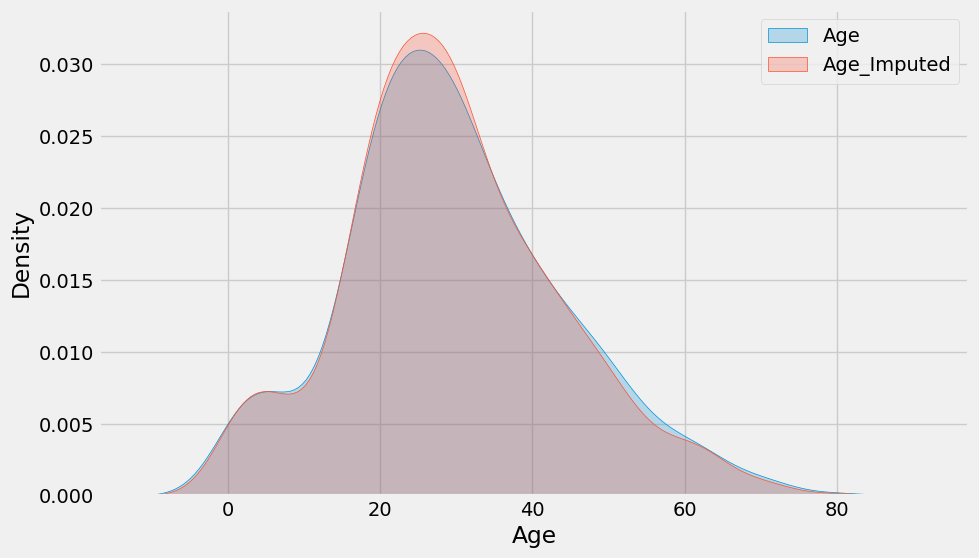

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))

sns.kdeplot(data=X_train,x='Age',fill=True,label="Age")
sns.kdeplot(data=X_train,x='Age_Imputed',fill=True,label="Age_Imputed")

plt.legend()
plt.show()

In [18]:
print("The variance before imputing the age feature is:",X_train['Age'].var())
print("The variance after imputing the age feature is:",X_train['Age_Imputed'].var())

The variance before imputing the age feature is: 208.16317218250535
The variance after imputing the age feature is: 198.36003646075352


In [19]:
X_train.cov()

,Age,Fare,Family,Age_Imputed
Age,208.163172,90.474153,-5.941745,208.163172
Fare,90.474153,2730.009961,17.217908,83.153312
Family,-5.941745,17.217908,2.837337,-4.156436
Age_Imputed,208.163172,83.153312,-4.156436,198.360036


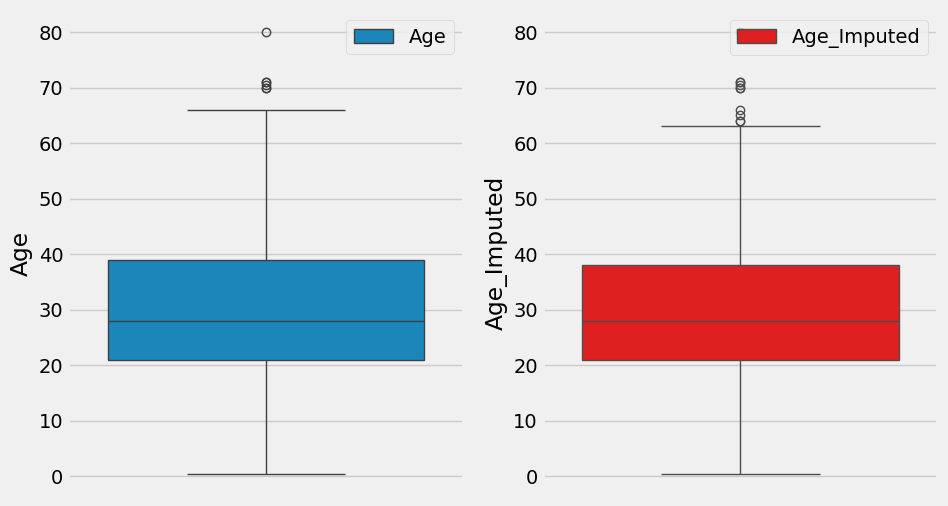

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.boxplot(data=X_train,y='Age',fill=True,label="Age",ax=ax[0])
sns.boxplot(data=X_train,y='Age_Imputed',fill=True,label="Age_Imputed",ax=ax[1],color='red')

plt.legend()
plt.show()

In [26]:
train=pd.read_csv("train.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])
train.sample(3)

,FireplaceQu,GarageQual,SalePrice
1292,NaN,TA,107500
42,NaN,TA,144000
1057,Gd,TA,248000


In [27]:
train.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [28]:
train['FireplaceQu_Imputed']=train['FireplaceQu']

In [29]:
train['GarageQual_Imputed']=train['GarageQual']

In [31]:
train.sample(3)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
331,NaN,TA,139000,NaN,TA
266,TA,TA,185000,TA,TA
1336,NaN,TA,135000,NaN,TA


In [35]:
train['FireplaceQu_Imputed'][train['FireplaceQu_Imputed'].isnull()]=train['FireplaceQu'].dropna().sample(train['FireplaceQu'].isnull().sum()).values

C:\Users\khadk\AppData\Local\Temp\ipykernel_12132\3138775888.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['FireplaceQu_Imputed'][train['FireplaceQu_Imputed'].isnull()]=train['FireplaceQu'].dropna().sample(train['FireplaceQu'].is

In [36]:
train['GarageQual_Imputed'][train['GarageQual_Imputed'].isnull()]=train['GarageQual'].dropna().sample(train['GarageQual'].isnull().sum()).values

C:\Users\khadk\AppData\Local\Temp\ipykernel_12132\3933069447.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['GarageQual_Imputed'][train['GarageQual_Imputed'].isnull()]=train['GarageQual'].dropna().sample(train['GarageQual'].isnull

In [37]:
train.sample(6)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
1013,NaN,TA,85000,TA,TA
1446,NaN,TA,157900,Gd,TA
1266,Gd,TA,122000,Gd,TA
1256,TA,TA,301500,TA,TA
1318,TA,TA,275000,TA,TA
673,TA,TA,257500,TA,TA


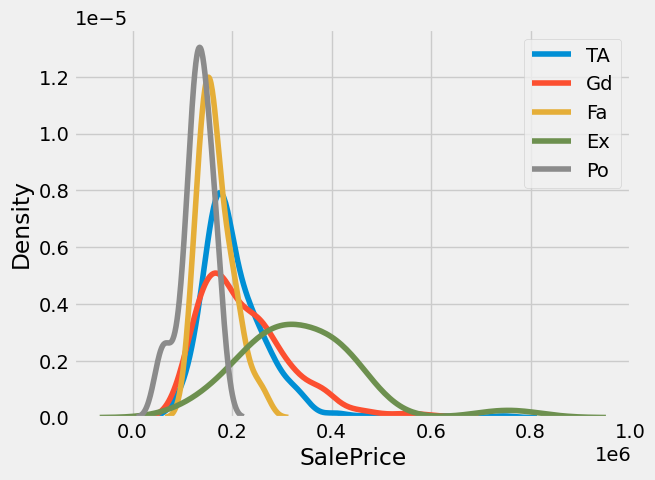

In [47]:
for category in train['FireplaceQu'].dropna().unique():
    sns.kdeplot(train[train['FireplaceQu']==category]['SalePrice'],label=category)

plt.legend()
plt.show()

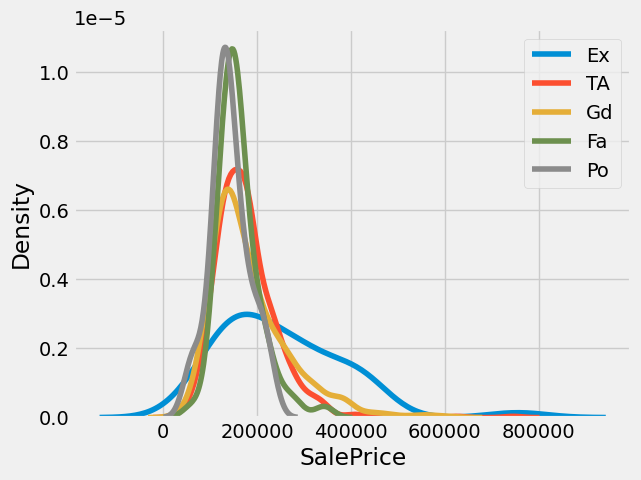

In [48]:
for category in train['FireplaceQu_Imputed'].dropna().unique():
    sns.kdeplot(train[train['FireplaceQu_Imputed']==category]['SalePrice'],label=category)

plt.legend()
plt.show()

In [52]:
fireplace=train['FireplaceQu'].value_counts()/len(train)
fireplace_imputed=train['FireplaceQu_Imputed'].value_counts()/len(train)

In [55]:
temp=pd.concat([fireplace,fireplace_imputed],axis=1)
temp.columns=('Original','After Imputation')
temp

,Original,After Imputation
Gd,0.260274,0.499315
TA,0.214384,0.402055
Fa,0.022603,0.042466
Ex,0.016438,0.030822
Po,0.013699,0.025342


In [58]:
garageQual=train['GarageQual'].value_counts()/len(train)
garageQual_imputed=train['GarageQual_Imputed'].value_counts()/len(train)

In [59]:
temp=pd.concat([garageQual,garageQual_imputed],axis=1)
temp.columns=('Original','After Imputation')
temp

,Original,After Imputation
TA,0.897945,0.952740
Fa,0.032877,0.033562
Gd,0.009589,0.009589
Ex,0.002055,0.002055
Po,0.002055,0.002055


**Important Points**
1. Randomly imputing the values in numerical features, does not generally affect the distribution of the feature. This is because the randomly selected value has a higher probability of being the most frequent  in the dataset. Such kind of imputation is genreally very useful for Linear models as the distribution is not affected (linear model makes assumptions about distribution), however, it might not be as favorable for tree-based models(as randomness introduces noise). Moreover, the boxplot also shows that the number of outliers and the variance before and after imputation is similar, however, the covariance changes. When you randomly insert values, you break the natural relationship between features. For example, imagine 'LotArea' and 'SalePrice' are usually positively correlated. Randomly imputing 'LotArea' values ignores this relationship → so covariance drops (correlation weakens). Variance stays the same because you're still inserting values from the same distribution, but inter-feature relationships get distorted.
2. Randomly imputing values for categorical features has given me two different insights. When the no of missing rows is <5% the ratio of categories remains relatively similar, however when there are a lot of missing values some categories might over-fill so the proportion does not remain constant so the ratios change.
3. Other disadvantage of using random imputation is the memory cost, since if the query point is a missing value, the model needs to remember the training dataset to impute the missing value. Moreover, if you randomly assign imputed values at prediction time without setting a random_state, the same input can give different results across runs — not good for production systems.